In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/archive-2/Test/real'
fake_images_path = 'D:/major project/archive-2/Test/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - accuracy: 0.5934 - loss: 0.6658 - val_accuracy: 0.7024 - val_loss: 0.5579
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.7211 - loss: 0.5419 - val_accuracy: 0.7377 - val_loss: 0.5172
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 283ms/step - accuracy: 0.7482 - loss: 0.4894 - val_accuracy: 0.7648 - val_loss: 0.4691
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 281ms/step - accuracy: 0.7959 - loss: 0.4310 - val_accuracy: 0.8028 - val_loss: 0.4230
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 299ms/step - accuracy: 0.8291 - loss: 0.3758 - val_accuracy: 0.8249 - val_loss: 0.3820
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - accuracy: 0.8712 - loss: 0.3028 - val_accuracy: 0.8336 - val_loss: 0.3621
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 283ms/step - accuracy: 0.8934 - loss: 0.2561 - val_accuracy: 0.8423 - val_loss: 0.3718
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 285ms/step - accuracy: 0.9101 - loss: 0

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/archive-2/Test/real'
fake_images_path = 'D:/major project/archive-2/Test/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 54s 312ms/step - accuracy: 0.5615 - loss: 0.7101 - val_accuracy: 0.6685 - val_loss: 0.5944
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.7074 - loss: 0.5651 - val_accuracy: 0.7295 - val_loss: 0.5329
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 302ms/step - accuracy: 0.7298 - loss: 0.5194 - val_accuracy: 0.7405 - val_loss: 0.4948
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 304ms/step - accuracy: 0.7703 - loss: 0.4759 - val_accuracy: 0.7575 - val_loss: 0.4895
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 302ms/step - accuracy: 0.7986 - loss: 0.4238 - val_accuracy: 0.7694 - val_loss: 0.4851
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 310ms/step - accuracy: 0.8287 - loss: 0.3729 - val_accuracy: 0.8111 - val_loss: 0.3937
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - accuracy: 0.8682 - loss: 0.2900 - val_accuracy: 0.8354 - val_loss: 0.3552
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 308ms/step - accuracy: 0.8912 - loss: 0

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Set paths to your dataset
real_images_path = 'D:/major project/Image Datasets/Dataset/real'
fake_images_path = 'D:/major project/Image Datasets/Dataset/fake'

# Load images and labels
def load_images(image_path, label):
    images = []
    labels = []
    for img in os.listdir(image_path):
        img_path = os.path.join(image_path, img)
        img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels

real_images, real_labels = load_images(real_images_path, 0)  # 0 for real
fake_images, fake_labels = load_images(fake_images_path, 1)  # 1 for fake

# Combine and preprocess the dataset
X = np.array(real_images + fake_images)
y = np.array(real_labels + fake_labels)

# Normalize the images
X = X / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred).astype(int)  # Round the probabilities to get binary output

# Classification report and confusion matrix
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=["Real", "Fake"]))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

# Function to predict if an image is real or fake
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    return 'Real' if prediction[0][0] < 0.5 else 'Fake'


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step - accuracy: 0.5731 - loss: 0.6933 - val_accuracy: 0.6700 - val_loss: 0.5859
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 247ms/step - accuracy: 0.7083 - loss: 0.5741 - val_accuracy: 0.7067 - val_loss: 0.5541
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.7226 - loss: 0.5403 - val_accuracy: 0.7489 - val_loss: 0.4853
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - accuracy: 0.7622 - loss: 0.4800 - val_accuracy: 0.7823 - val_loss: 0.4565
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - accuracy: 0.7869 - loss: 0.4431 - val_accuracy: 0.7974 - val_loss: 0.4301
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 263ms/step - accuracy: 0.8288 - loss: 0.3771 - val_accuracy: 0.8240 - val_loss: 0.3904
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - accuracy: 0.8551 - loss: 0.3347 - val_accuracy: 0.8313 - val_loss: 0.3938
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.8829 - loss: 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='binary')
recall = recall_score(y_val, y_pred, average='binary')
f1 = f1_score(y_val, y_pred, average='binary')

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generate a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_val, y_pred, target_names=["Real", "Fake"]))

# Plot the confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


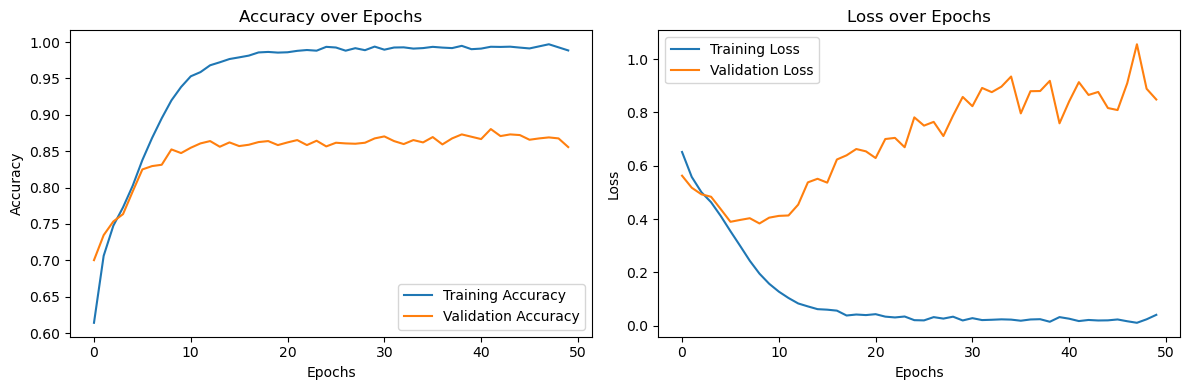

In [6]:
import matplotlib.pyplot as plt
# Visualize training history
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
# Plot training history
plot_training_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

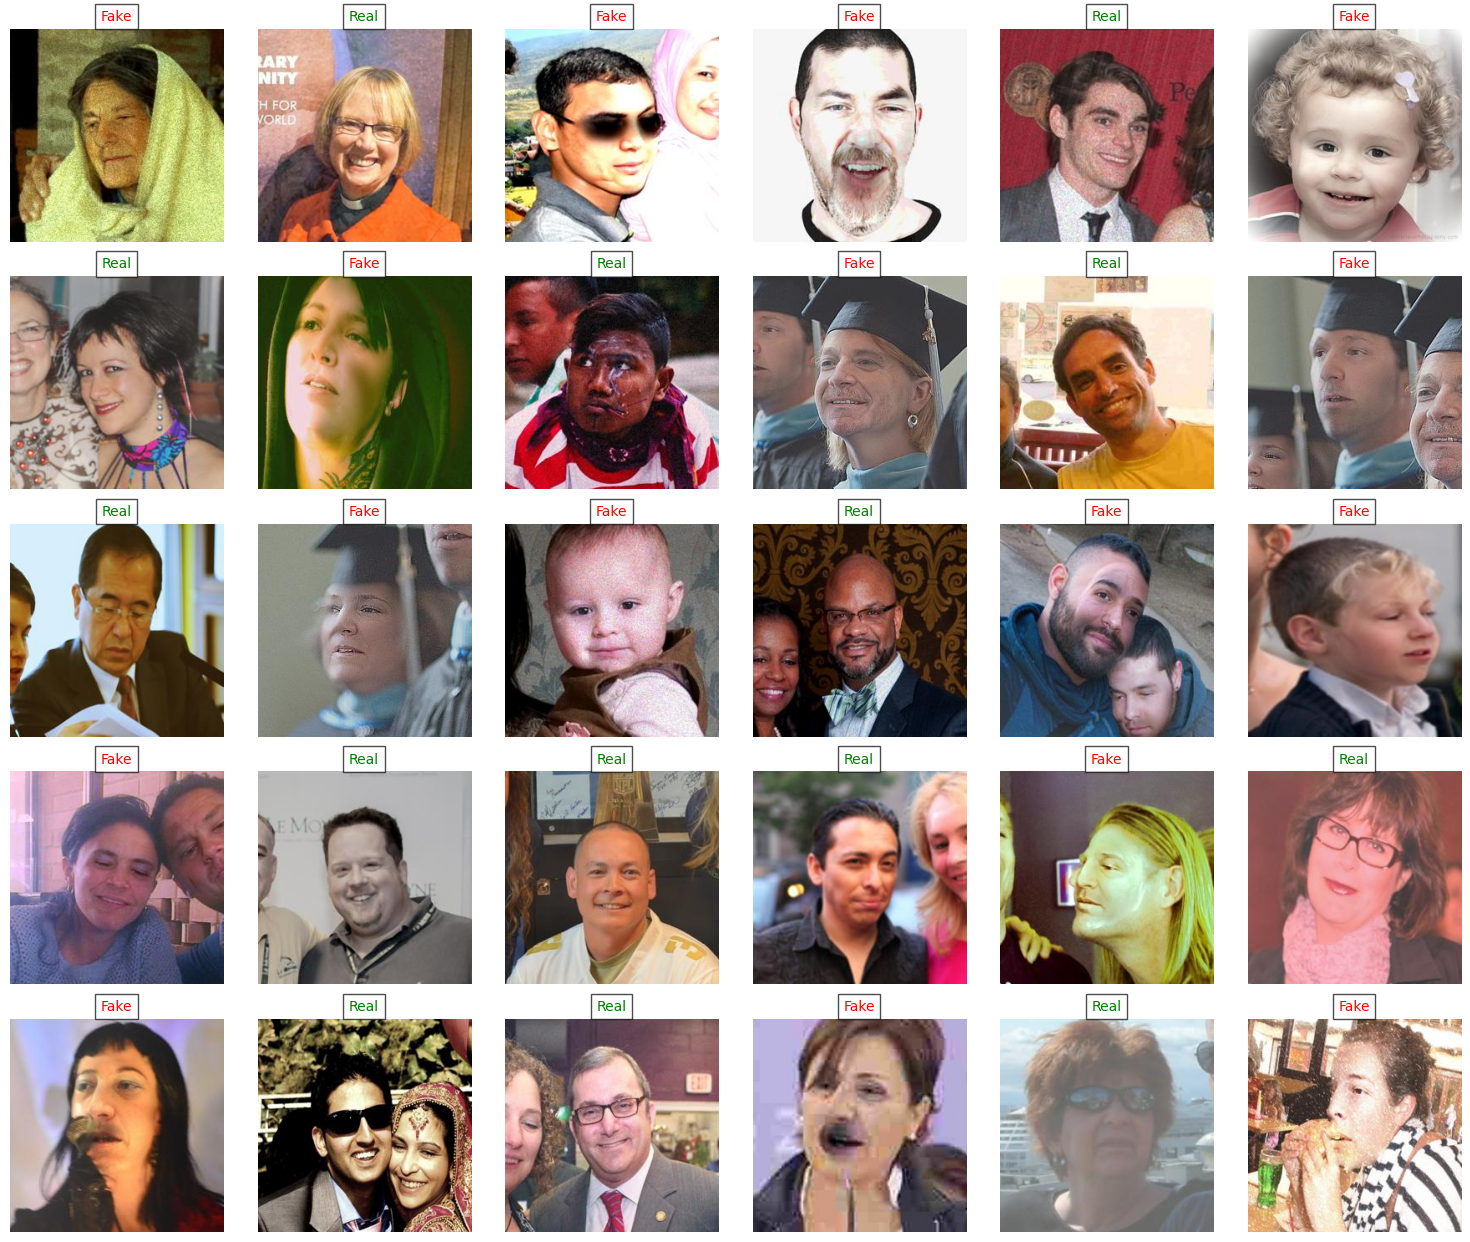

In [27]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to display multiple images with predictions
def display_images_with_predictions(img_folder, model, num_images=100):
    # Get a list of image paths
    img_paths = [os.path.join(img_folder, img) for img in os.listdir(img_folder)][:num_images]
    
    # Set up the grid size
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid size (rows and columns)

    # Create a figure
    plt.figure(figsize=(15, 15))

    for i, img_path in enumerate(img_paths):
        # Load the image using PIL
        img = Image.open(img_path)

        # Predict the image class
        prediction = predict_image(img_path)

        # Choose color based on prediction
        color = 'green' if prediction == "Real" else 'red'

        # Add a subplot for the current image
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes

        # Overlay the prediction as text
        plt.title(
            prediction,
            fontsize=10,
            color=color,
            bbox=dict(facecolor='white', alpha=0.7)
        )

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()

# Folder containing the images
img_folder = 'D:/major project/archive-2/Sample'  # Change to appropriate folder

# Display 30 images with predictions
display_images_with_predictions(img_folder, model, num_images=30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


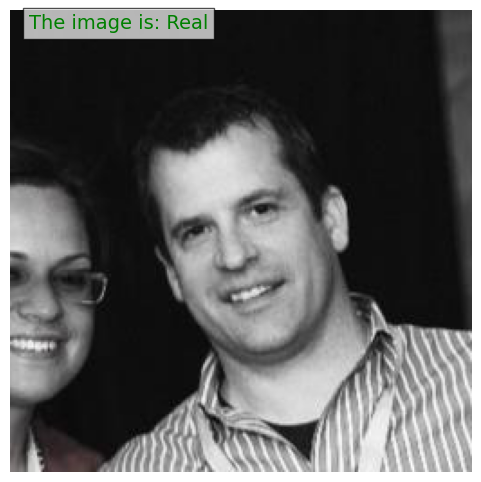

In [22]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

# Function to display image with prediction
def display_image_with_prediction(img_path, prediction):
    # Load the image using PIL
    img = Image.open(img_path)

    # Set up the plot
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide the axes

    # Overlay the prediction as text
    color = 'green' if prediction == "Real" else 'red'  # Green for Real, Red for Fake
    plt.text(
        10, 10,  # Position (x, y)
        f'The image is: {prediction}',  # Text to display
        fontsize=14, color=color, bbox=dict(facecolor='white', alpha=0.7)
    )

    # Show the image
    plt.show()

# Path to the image
img_path = 'D:/major project/archive-2/sample/772.jpg'

# Predict the image class
prediction = predict_image(img_path)

# Display the image with the prediction
display_image_with_prediction(img_path, prediction)
